# Project Introduction

### Executive Summary
* Understand data and present insights from data exploration, modelling and a quickshot at expected annual revenue.
* Analysis: Provide a walkthroughe of data exploration performed, for visualization of how we got to the insights above.
* Modelling and Forecasting: Why and how of model selection.Showcase results and possible business benefits

## Dataset Description

The dataset covers 2016 days between 1 January 2015 and 6 October 2020. During some intraday intervals RRP was negative, so that energy producers were paying consumers rather than wise versa. 

#### Data Definations


* date : datetime, the date of the recording
* demand : float, a total daily electricity demand in MWh
* RRP : float, a recommended retail price in AUD in MWh
* demand_pos_RRP = float, a total daily demand at positive RRP in MWh
* RRP_positive = float, an averaged positive RRP, weighted by the corresponding intraday demand in AUD per MWh
* demand_neg_RRP = float, an total daily demand at negative RRP in MWh
* RRP_negative : float, an average negative RRP, weighted by the corresponding intraday demand in AUD per MWh
* frac_at_neg_RRP : float, a fraction of the day when the demand was traded at negative RRP
* min_temperature : float, minimum temperature during the day in Celsius
* max_temperature : float, maximum temperature during the day in Celsius
* solar_exposure : float, total daily sunlight energy in MJ/m^2
* rainfall : float, daily rainfall in mm
* school_day : boolean, if students were at school on that day
* holiday : boolean, if the day was a state or national holiday

#### Import libraries and "Get the Data"

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

* Reading the dataset
* Including Average temperature as the average of minimum and maximum temperature
* Including dummy variable for weekday and weekend

In [2]:
data = pd.read_csv('energy_demand.csv', parse_dates=['date'])

In [3]:
data.head(3)

,date,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday
0,2015-01-01,99635.03,25.633696,97319.240,26.415953,2315.790,-7.240000,0.020833,13.3,26.9,23.6,0.0,N,Y
1,2015-02-01,129606.01,33.138988,121082.015,38.837661,8523.995,-47.809776,0.062500,15.4,38.8,26.8,0.0,N,N
2,2015-03-01,142300.54,34.564855,142300.540,34.564855,0.000,0.000000,0.000000,20.0,38.2,26.5,0.0,N,N


In [4]:
#Data transformations
data["Avg_temperature"] = data[['max_temperature','min_temperature']].mean(axis=1)
data['weekday'] = ['Y' if x <= 4 else 'N' for x in data['date'].dt.weekday]

## Descriptive Statistics

In [5]:
round(data.describe().transpose())

,count,mean,std,min,25%,50%,75%,max
demand,2106.0,120035.0,13748.0,85094.0,109964.0,119586.0,130436.0,170654.0
RRP,2106.0,76.0,130.0,-6.0,39.0,67.0,95.0,4550.0
demand_pos_RRP,2106.0,119252.0,14819.0,41988.0,109246.0,119148.0,130119.0,170654.0
RRP_positive,2106.0,77.0,130.0,14.0,39.0,67.0,95.0,4550.0
demand_neg_RRP,2106.0,783.0,3579.0,0.0,0.0,0.0,0.0,57598.0
RRP_negative,2106.0,-3.0,19.0,-342.0,0.0,0.0,0.0,0.0
frac_at_neg_RRP,2106.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
min_temperature,2106.0,12.0,4.0,1.0,8.0,11.0,15.0,28.0
max_temperature,2106.0,20.0,6.0,9.0,16.0,19.0,24.0,44.0
solar_exposure,2105.0,15.0,8.0,1.0,8.0,13.0,21.0,33.0


## No of Holidays & School Day

In [6]:
print(data['holiday'].value_counts())
print(data['school_day'].value_counts())
print(data['weekday'].value_counts())

N    2029
Y      77
Name: holiday, dtype: int64
Y    1453
N     653
Name: school_day, dtype: int64
Y    1506
N     600
Name: weekday, dtype: int64


# Missing Values

In [7]:
data.isnull().sum()

date               0
demand             0
RRP                0
demand_pos_RRP     0
RRP_positive       0
demand_neg_RRP     0
RRP_negative       0
frac_at_neg_RRP    0
min_temperature    0
max_temperature    0
solar_exposure     1
rainfall           3
school_day         0
holiday            0
Avg_temperature    0
weekday            0
dtype: int64

### Being Proportionally Less, removing nulls

In [8]:
data.dropna(inplace=True)

# Demand - Seasonal and trend 

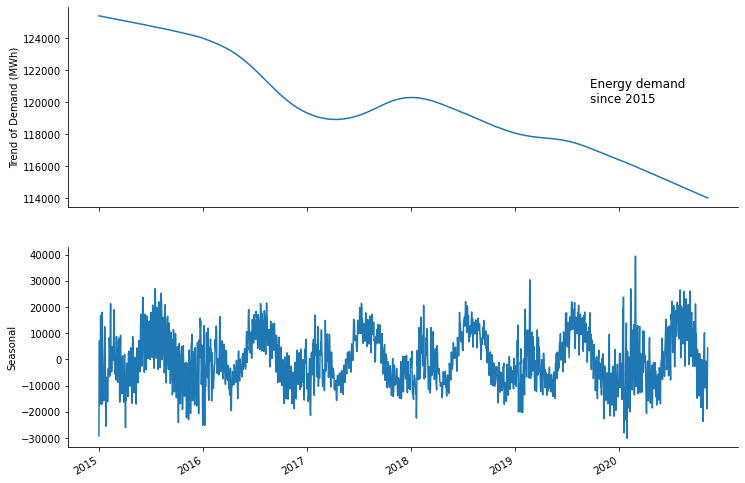

In [9]:
from statsmodels.tsa.seasonal import STL
decomposition = STL(data['demand'], period=365).fit()

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1,
                               figsize=(12,9), sharex=True)

ax1.plot(decomposition.trend)
ax1.set_ylabel('Trend of Demand (MWh)')
ax1.text(1700, 120000, s="""Energy demand
since 2015""", fontsize=12)

ax2.plot(decomposition.seasonal)
ax2.set_ylabel('Seasonal')

plt.xticks(np.arange(0, 2100, 360), np.arange(2015, 2021, 1))
fig.autofmt_xdate()
sns.despine()
plt.show()

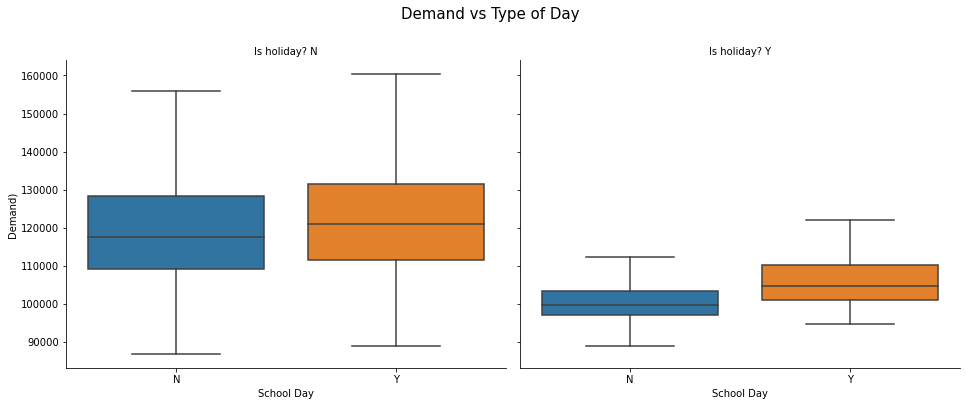

In [10]:
g = sns.catplot(data=data, x='school_day', y='demand', kind='box',
                showfliers=False, col='holiday', col_order=['N', 'Y'],
               aspect=12/9)

g.set_axis_labels('School Day', 'Demand)')
g.set_titles('Is holiday? {col_name}')

plt.suptitle("Demand vs Type of Day", fontsize=15, y=1.08)
plt.show()

### Demand -> Weekdays Vs Weekends

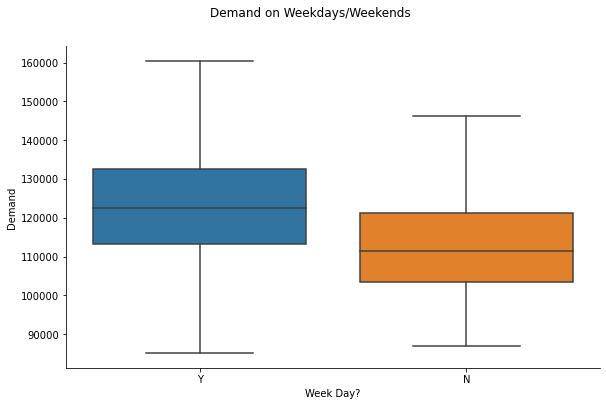

In [11]:
# GraphData = Data[['demand', 'school_day', 'date']]

g = sns.catplot(data=data, x='weekday', y='demand', kind='box',
                showfliers=False, aspect=15/9)

g.set_axis_labels('Week Day?', 'Demand')

plt.suptitle("Demand on Weekdays/Weekends", fontsize=12, y=1.08)
plt.show()

### REGRESSION > Data Review & Preparation

In [12]:
data.shape

(2102, 16)

In [13]:
data.columns

Index(['date', 'demand', 'RRP', 'demand_pos_RRP', 'RRP_positive',
       'demand_neg_RRP', 'RRP_negative', 'frac_at_neg_RRP', 'min_temperature',
       'max_temperature', 'solar_exposure', 'rainfall', 'school_day',
       'holiday', 'Avg_temperature', 'weekday'],
      dtype='object')

In [14]:
#Converting holiday,school day and weekday into dummy variables

data["holiday"] = pd.get_dummies(data['holiday'],drop_first=True, )
#Data["holiday"] = Data["holiday"].astype('category', copy = False)

data["school_day"] = pd.get_dummies(data['school_day'],drop_first=True)
#Data["school_day"] = Data["school_day"].astype('category', copy = False)

data["weekday"] = pd.get_dummies(data['weekday'],drop_first=True)
#Data["weekday"] = Data["weekday"].astype('category', copy = False)

In [15]:
#data.head(3)

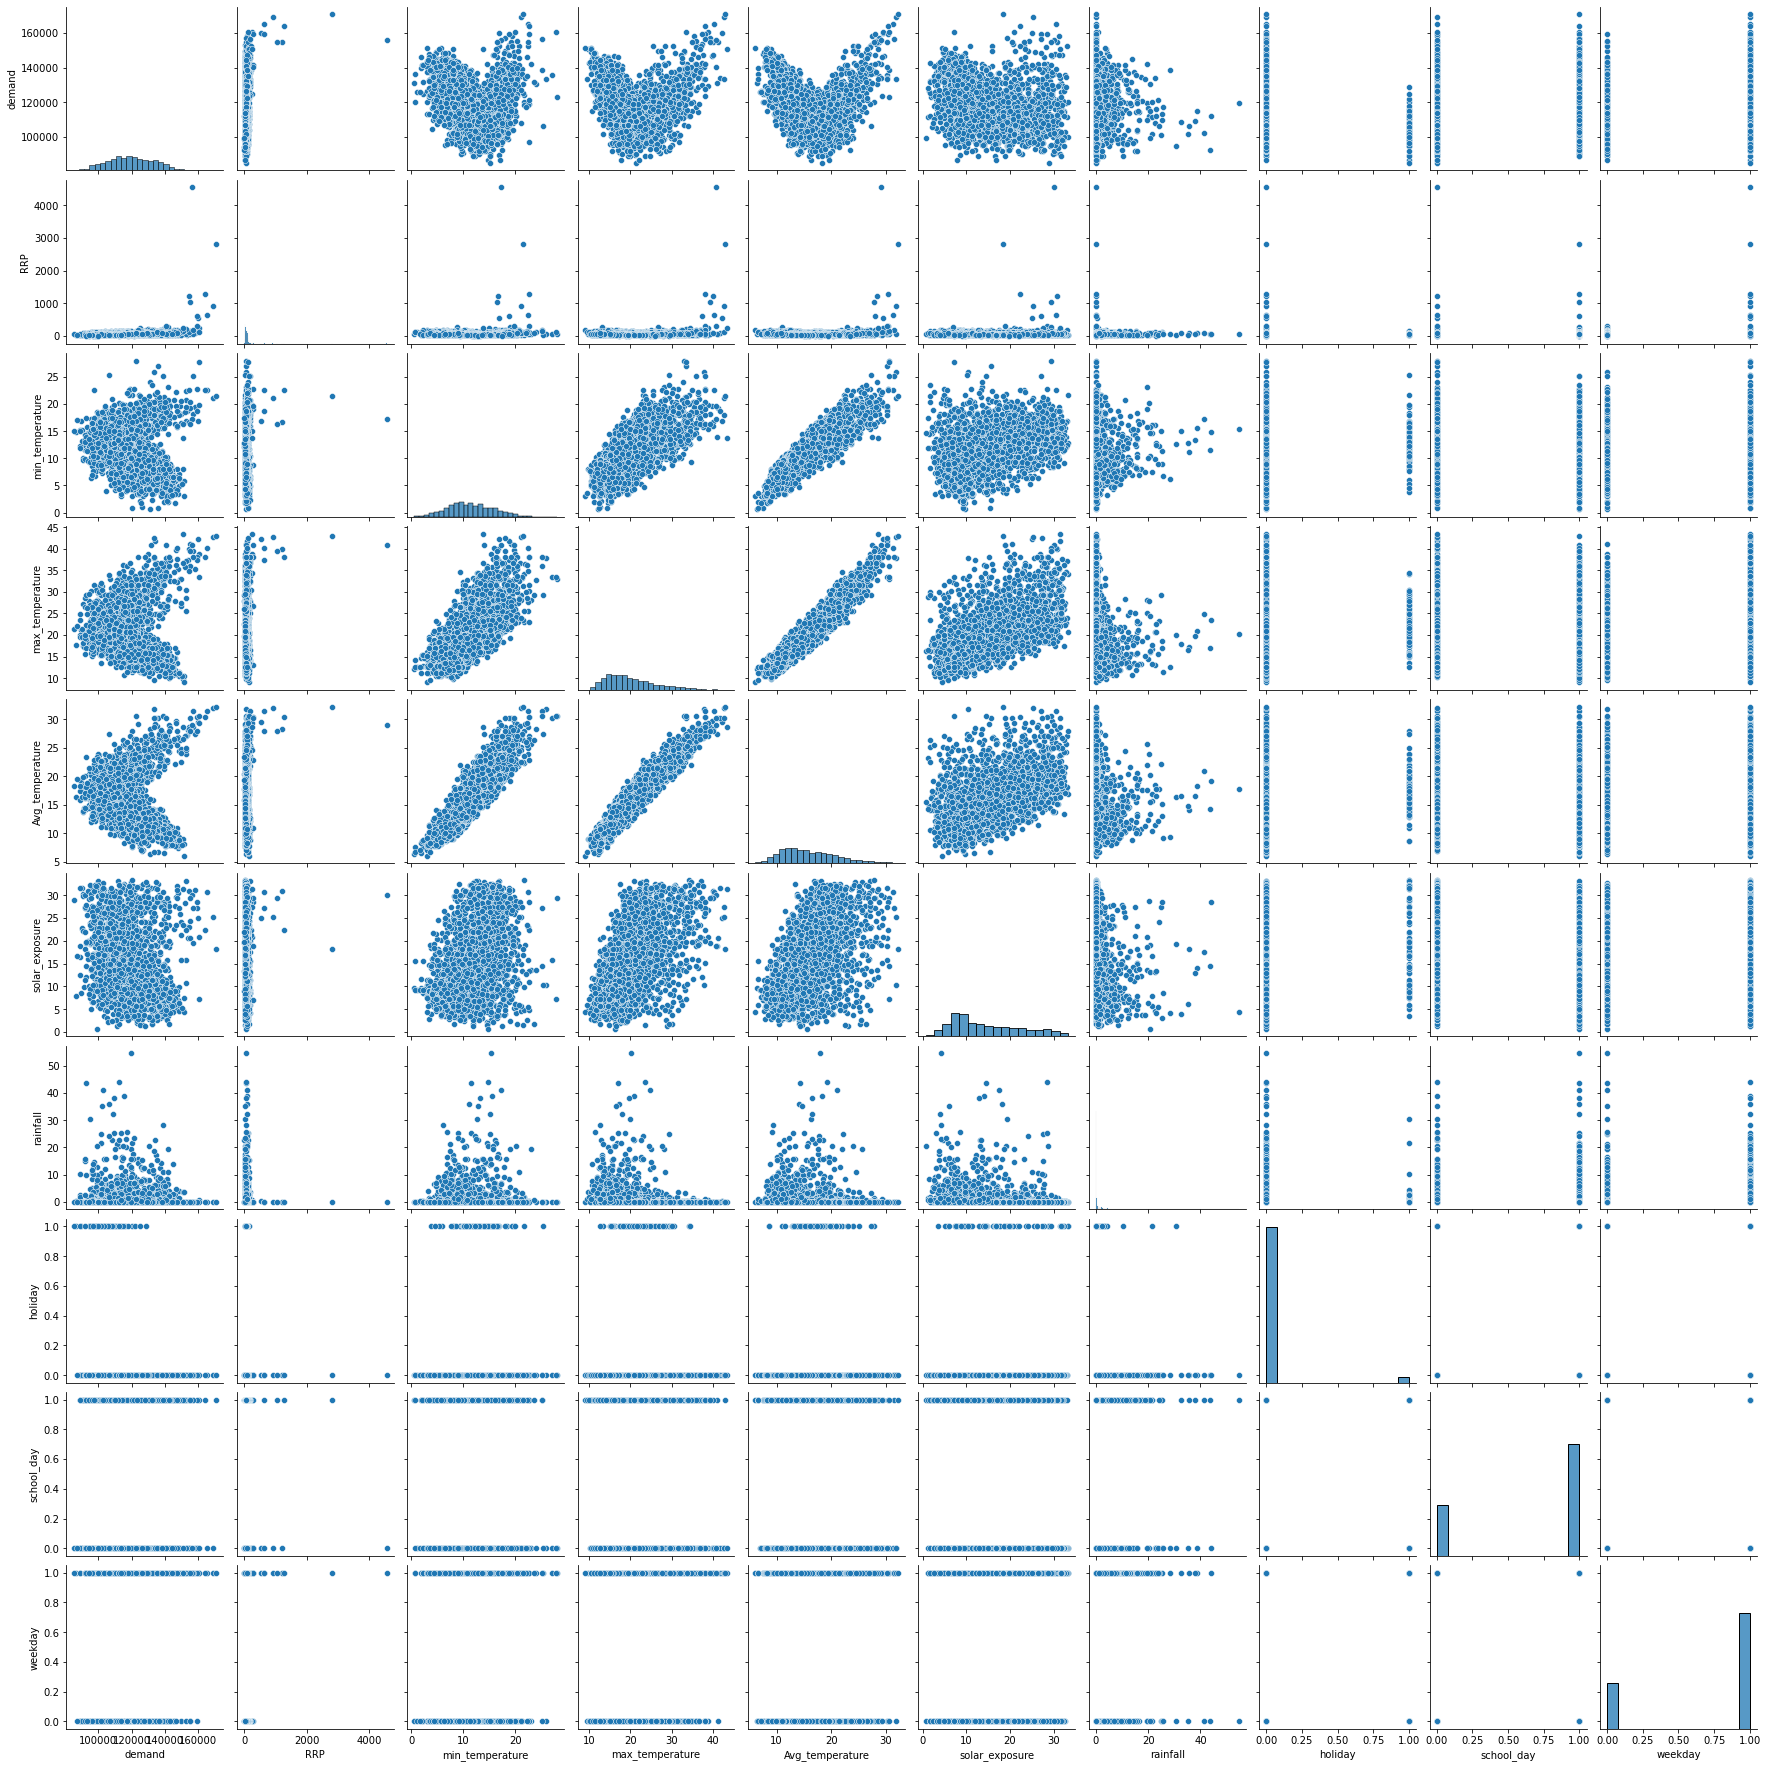

In [16]:
newdata = data[['demand', 'RRP', 'min_temperature', 'max_temperature', 'Avg_temperature','solar_exposure', 
                'rainfall','holiday','school_day','weekday']]

# pairplot
sns.pairplot(newdata)
plt.show()

* RRP & Rainfall has evident outliers

<AxesSubplot:ylabel='RRP'>

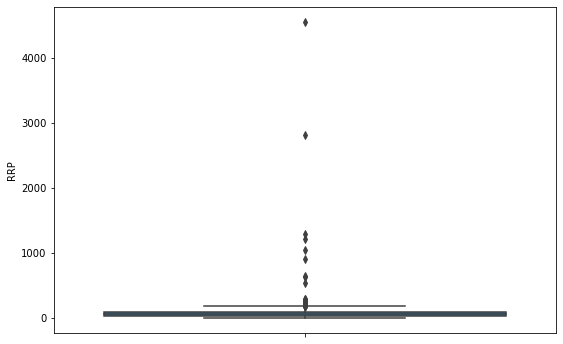

In [64]:
plt.figure(figsize = (9,6))
sns.boxplot(y= newdata.RRP)

In [17]:
# plt.figure(figsize = (9,6))
#sns.boxplot(y= newdata.RRP)
newdata.head(3)

,demand,RRP,min_temperature,max_temperature,Avg_temperature,solar_exposure,rainfall,holiday,school_day,weekday
0,99635.03,25.633696,13.3,26.9,20.1,23.6,0.0,1,0,1
1,129606.01,33.138988,15.4,38.8,27.1,26.8,0.0,0,0,0
2,142300.54,34.564855,20.0,38.2,29.1,26.5,0.0,0,0,0


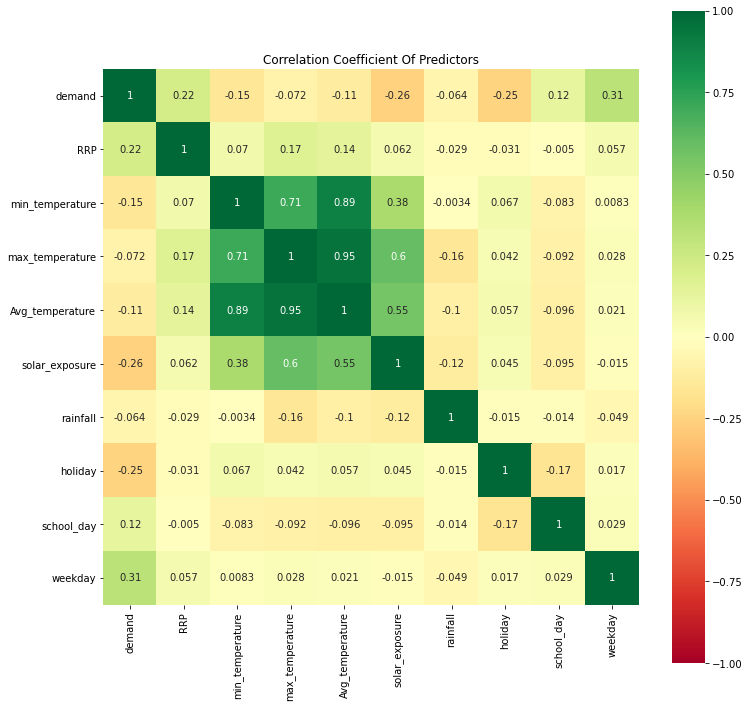

In [18]:
#newdata = data.drop('demand',axis = 1)
plt.figure(figsize=(12,12))

sns.heatmap(newdata.corr(), annot=True,cmap='RdYlGn',square=True,vmin=-1, vmax=1)

#sns.heatmap(data.corr(), annot=True, mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Coefficient Of Predictors')
plt.show()

In [19]:
# Correlation Matrix
round(newdata.corr(), 2)

,demand,RRP,min_temperature,max_temperature,Avg_temperature,solar_exposure,rainfall,holiday,school_day,weekday
demand,1.00,0.22,-0.15,-0.07,-0.11,-0.26,-0.06,-0.25,0.12,0.31
RRP,0.22,1.00,0.07,0.17,0.14,0.06,-0.03,-0.03,-0.00,0.06
min_temperature,-0.15,0.07,1.00,0.71,0.89,0.38,-0.00,0.07,-0.08,0.01
max_temperature,-0.07,0.17,0.71,1.00,0.95,0.60,-0.16,0.04,-0.09,0.03
Avg_temperature,-0.11,0.14,0.89,0.95,1.00,0.55,-0.10,0.06,-0.10,0.02
solar_exposure,-0.26,0.06,0.38,0.60,0.55,1.00,-0.12,0.05,-0.10,-0.01
rainfall,-0.06,-0.03,-0.00,-0.16,-0.10,-0.12,1.00,-0.01,-0.01,-0.05
holiday,-0.25,-0.03,0.07,0.04,0.06,0.05,-0.01,1.00,-0.17,0.02
school_day,0.12,-0.00,-0.08,-0.09,-0.10,-0.10,-0.01,-0.17,1.00,0.03
weekday,0.31,0.06,0.01,0.03,0.02,-0.01,-0.05,0.02,0.03,1.00


# REGRESSION

In [20]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

In [34]:
Y = data['demand']
X = data.loc[:, ['RRP', 'min_temperature', 'max_temperature', 'solar_exposure', 'rainfall', 
                 'school_day', 'holiday', 'Avg_temperature', 'weekday']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.27)

### ** Train/fit lm on the training data.**

In [35]:
model = sm.OLS(Y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 demand   R-squared (uncentered):                   0.938
Model:                            OLS   Adj. R-squared (uncentered):              0.938
Method:                 Least Squares   F-statistic:                              2882.
Date:                Fri, 02 Sep 2022   Prob (F-statistic):                        0.00
Time:                        23:11:56   Log-Likelihood:                         -17998.
No. Observations:                1534   AIC:                                  3.601e+04
Df Residuals:                    1526   BIC:                                  3.605e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
RRP                13.7715      5.240      2.628      0.009       3.492      24.051
min_temperature  -378.8969    238.834     -1.586      0.113    -847.374      89.580
max_temperature  2946.2478    192.043     15.342      0.000    2569.552    3322.944
solar_exposure   -439.9405    122.532     -3.590      0.000    -680.290    -199.592
rainfall         1318.0660    190.289      6.927      0.000     944.810    1691.322
school_day       2.789e+04   1535.487     18.163      0.000    2.49e+04    3.09e+04
holiday         -2764.8684   4353.049     -0.635      0.525   -1.13e+04    5773.723
Avg_temperature  1283.6755     53.841     23.842      0.000    1178.064    1389.287
weekday          2.992e+04   1597.052     18.734      0.000    2.68e+04    3.31e+04
==============================================================================
Omnibus:                       11.656   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               11.377
Skew:                           0.185   Prob(JB):                      0.00338
Kurtosis:                       2.798   Cond. No.                     7.60e+16
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 7.78e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Detecting Multicollinearity with VIF

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [36]:
vif = pd.DataFrame()
vif['feature'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i)
              for i in range(len(X_train.columns))]
  
print(vif)

           feature       VIF
0              RRP  1.339093
1  min_temperature       inf
2  max_temperature       inf
3   solar_exposure  7.161493
4         rainfall  1.140776
5       school_day  2.747098
6          holiday  1.058273
7  Avg_temperature       inf
8          weekday  3.030457


D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Since VIF score above 10 indicates correlation and is a cause of concern hence removing min_temperature &  max_temperature from the model

# Re-running the regression

In [55]:
Y = np.log(data['demand'])
X = data.loc[:, ['RRP', 'solar_exposure', 'rainfall', 'school_day', 'holiday', 'weekday']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.27)


In [56]:
model = sm.OLS(Y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 demand   R-squared (uncentered):                   0.905
Model:                            OLS   Adj. R-squared (uncentered):              0.905
Method:                 Least Squares   F-statistic:                              2423.
Date:                Fri, 02 Sep 2022   Prob (F-statistic):                        0.00
Time:                        23:22:42   Log-Likelihood:                         -4144.0
No. Observations:                1534   AIC:                                      8300.
Df Residuals:                    1528   BIC:                                      8332.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
RRP                0.0028      0.001      4.462      0.000       0.002       0.004
solar_exposure     0.2915      0.009     32.071      0.000       0.274       0.309
rainfall           0.1955      0.023      8.529      0.000       0.151       0.240
school_day         4.0294      0.174     23.177      0.000       3.688       4.370
holiday            1.8532      0.540      3.430      0.001       0.793       2.913
weekday            4.1073      0.179     22.891      0.000       3.755       4.459
==============================================================================
Omnibus:                        3.137   Durbin-Watson:                   1.699
Prob(Omnibus):                  0.208   Jarque-Bera (JB):                3.106
Skew:                           0.110   Prob(JB):                        0.212
Kurtosis:                       3.007   Cond. No.                         983.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
vif = pd.DataFrame()
vif['feature'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i)
              for i in range(len(X_train.columns))]
  
print(vif)

          feature       VIF
0             RRP  1.271989
1  solar_exposure  2.711112
2        rainfall  1.102740
3      school_day  2.431582
4         holiday  1.051234
5         weekday  2.735793


VIF score for all the variables is less than 5 hence no multicollinearity. Can ignore Avg_Temp as it's on the borderline

# RESIDUAL PLOTS

<AxesSubplot:ylabel='Count'>

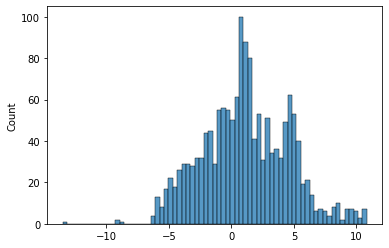

In [58]:
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.histplot((model.resid),bins=69)

Assumptions of Linear Regression
1. Model performance seems is good as R-Square = 0.905 and adjusted R-Squared = 0.905 (both are ~ 1)
2. Model have Durbin-Watson Score = 1.699 (which is between 0 and 4), we can assume there is no Autocorrelation
3. As we can see VIF<5 which means no Multicollinearity
4. P value is less the 0.05 for all the coefficients which means the coefficicents are statistically significant.

Text(0, 0.5, 'Predicted Y')

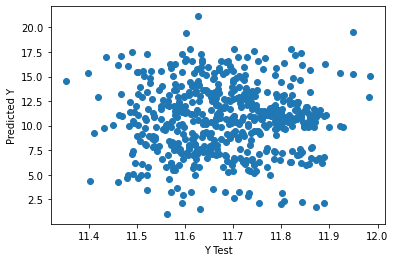

In [59]:
predictions = model.get_prediction(X_test)
meanpredictions = predictions.summary_frame()["mean"]
plt.scatter(Y_test,meanpredictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [61]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(Y_test, meanpredictions))
print('MSE:', metrics.mean_squared_error(Y_test, meanpredictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, meanpredictions)))

MAE: 2.838638720141893
MSE: 13.086117874261602
RMSE: 3.617473963176736
